# Machine Learning e Data Science com Python

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Exploração dos dados

In [47]:
base_credit = pd.read_csv(r'resource\credit_data.csv')

In [48]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [49]:
# 5 Primeiro registros
base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [50]:
# 5 Ultimos registros
base_credit.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [51]:
#Estatística da base de dados
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [52]:
#Pessoa que tem o maior renda
base_credit[base_credit['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [53]:
#Pessoa que tem a menor divida
base_credit[base_credit['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


### Visualização dos dados

In [73]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

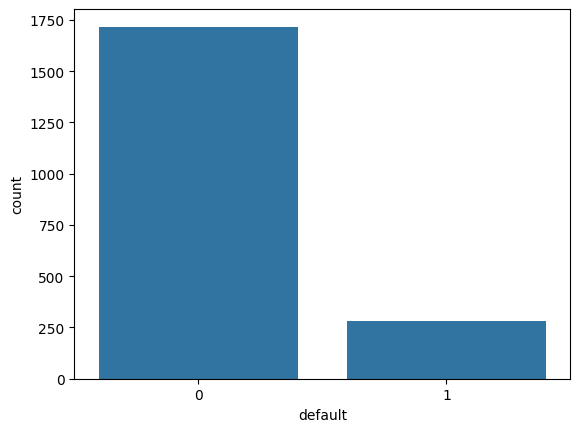

In [74]:
sns.countplot(x = base_credit['default']);

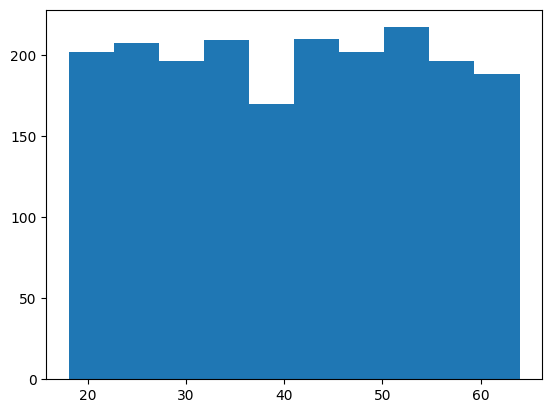

In [75]:
plt.hist(x=base_credit['age']);

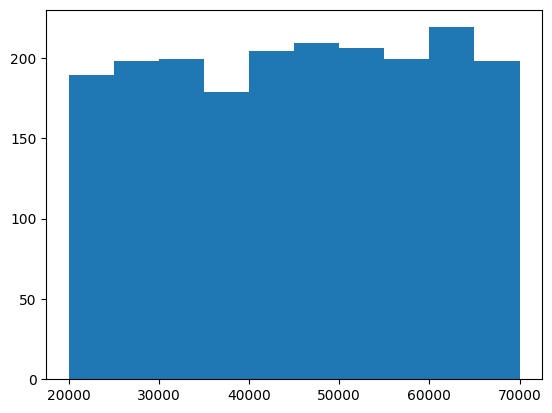

In [76]:
plt.hist(x= base_credit['income']);

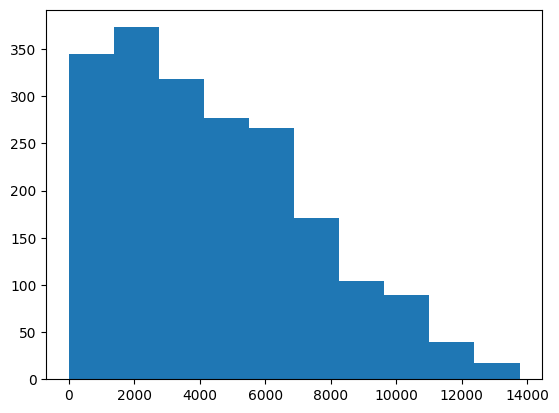

In [77]:
plt.hist(x= base_credit['loan']);

In [59]:
import plotly.io as pio
pio.renderers.default = 'browser'
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color='default')
grafico.show()

### Tratamento de valores inconsistentes

In [60]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [61]:
#Apaga a coluna inteira (de todos os registros da base de dados)
base_credit2 = base_credit.drop('age', axis = 1)
base_credit2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [62]:
#Apaga somente os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [63]:
#Preenche os valores inconsistentes manualmente

In [64]:
#Preenche os valores faltantes com a média
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [65]:
base_credit['age'].mean()

np.float64(40.80755937840458)

In [66]:
base_credit['age'][base_credit['age'] > 0].mean()

np.float64(40.92770044906149)

In [67]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92;

In [68]:
base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default


In [70]:
base_credit.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


### Tratamento de valores faltantes

In [78]:
base_credit.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [79]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
#Mostra os dados que são Null
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
#Preenche os dados que não tinham valor com a média
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)

C:\Users\mathe\AppData\Local\Temp\ipykernel_21540\2022543483.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [84]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default


In [ ]:
#Clientes que não tinham valores na coluna age
base_credit.loc[(base_credit['clientid'] == 29) | (base_credit['clientid'] == 31 ) | (base_credit['clientid'] == 32 )]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [86]:
# A mesma consulta de cima
base_credit.loc[base_credit['clientid'].isin([29, 30, 31])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
29,30,58842.891308,54.510948,10871.186790,0
30,31,48528.852796,40.927689,6155.784670,0
